In [1]:
#Momentum trading strategy using future price prediction using an LSTM. 
#Code adapted from ChatGPT

import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import nsepy
import matplotlib.pyplot as plt

# Load the data
data = nsepy.get_history(symbol='WIPRo', start=pd.to_datetime('2021-01-01'), end=pd.to_datetime('2021-07-21'))
closing_prices = data['Close'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices = scaler.fit_transform(closing_prices)

# Split the data into train and test sets
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[0:train_size,:], closing_prices[train_size:len(closing_prices),:]

# Reshape the data for LSTM model
look_back = 2
train_X, train_Y = np.array([train[i:(i+look_back), 0] for i in range(len(train)-look_back)]), np.array([train[i+look_back, 0] for i in range(len(train)-look_back)])
test_X, test_Y = np.array([test[i:(i+look_back), 0] for i in range(len(test)-look_back)]), np.array([test[i+look_back, 0] for i in range(len(test)-look_back)])

train_X, test_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1)), np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=1)

# Make predictions
train_predict, test_predict = scaler.inverse_transform(model.predict(train_X)), scaler.inverse_transform(model.predict(test_X))
test_Y=scaler.inverse_transform(test_Y.reshape(-1,1))


AttributeError: module 'tensorflow.compat.v2' has no attribute '__internal__'

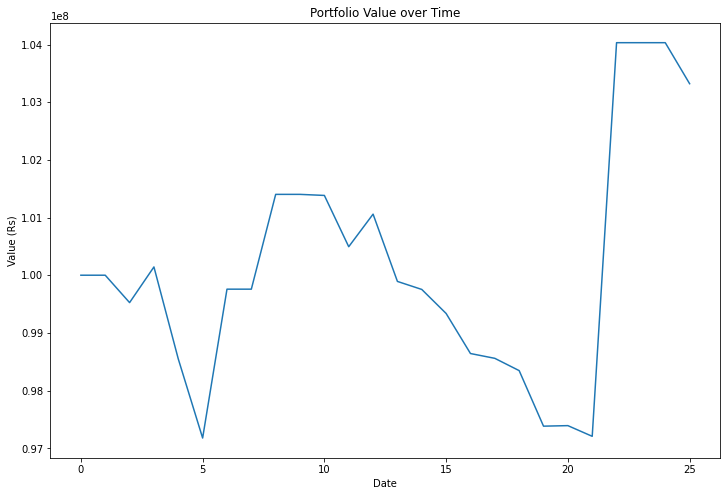

In [49]:
# Initialize portfolio
initial_investment=100000000
portfolio_value = initial_investment
holdings = 0

# Initialize lists for portfolio value and profits
portfolio_values = [portfolio_value]
profits = []

# Iterate over each day in the test set
for i in range(len(test_predict)-1):

    predicted_price, current_price = test_predict[i][0], test_Y[i]


    

    # Calculate the change in price and update the portfolio
    price_delta = predicted_price - current_price[0]
    if price_delta > 0:
        # Buy
        num_shares = int(portfolio_value / current_price[0])
        portfolio_value -= num_shares * current_price[0]
        holdings += num_shares

    elif price_delta < 0:
        
        # Sell
        num_shares = int(holdings)
        portfolio_value += num_shares * current_price[0]
        holdings -= num_shares
        
    # Update portfolio value and profits
    portfolio_values.append(portfolio_value + holdings * current_price[0])
    profits.append(portfolio_values[-1] - initial_investment)

# Plot portfolio value and profits
plt.figure(figsize=(12, 8))
plt.plot(portfolio_values)
plt.title("Portfolio Value over Time")
plt.xlabel("Date")
plt.ylabel("Value (Rs)")
plt.show()



In [56]:
# Print final portfolio value
print("Final Portfolio Value: Rs", portfolio_values[-1])

Final Portfolio Value: Rs 103320423.19999997


In [57]:
print("Total Profit: Rs "+ str(portfolio_values[-1]-initial_investment))

Total Profit: Rs 3320423.199999973


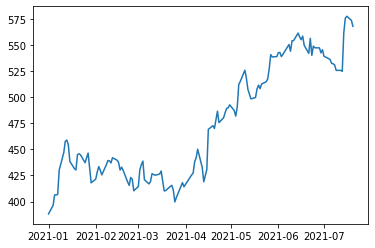

In [58]:
#Original data

plt.plot(data['Close'])

In [2]:
data

NameError: name 'data' is not defined

In [3]:
import nsepy
data = nsepy.get_history(symbol='WIPRo', start=pd.to_datetime('2021-01-01'), end=pd.to_datetime('2021-07-21'))


In [18]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import nsepy
import matplotlib.pyplot as plt

# Load the data
data = nsepy.get_history(symbol='WIPRo', start=pd.to_datetime('2021-01-01'), end=pd.to_datetime('2021-07-21'))
closing_prices = data['Close'].values.reshape(-1,1)

In [19]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,WIPRO,EQ,386.25,385.05,390.75,385.05,387.50,388.10,388.00,5042336,1.956434e+14,67053,1214950,0.2409
2021-01-04,WIPRO,EQ,388.10,390.00,397.95,387.80,396.70,396.40,393.91,9755721,3.842841e+14,94914,3356855,0.3441
2021-01-05,WIPRO,EQ,396.40,394.10,409.80,393.50,405.50,406.30,403.28,25156747,1.014529e+15,188362,8146042,0.3238
2021-01-06,WIPRO,EQ,406.30,405.00,417.40,403.30,405.90,406.40,410.04,22486300,9.220185e+14,193337,5485151,0.2439
2021-01-07,WIPRO,EQ,406.40,412.25,413.00,403.85,407.50,406.75,406.88,12344755,5.022833e+14,97582,3647681,0.2955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,WIPRO,EQ,524.85,526.25,563.30,525.60,561.55,561.70,551.00,29348083,1.617068e+15,297165,5684371,0.1937
2021-07-15,WIPRO,EQ,561.70,561.00,579.65,559.00,578.35,575.90,572.71,31066201,1.779185e+15,339133,3864064,0.1244
2021-07-16,WIPRO,EQ,575.90,580.00,589.25,568.30,576.85,577.75,577.56,36907827,2.131641e+15,342240,9712637,0.2632
